# User Churn Prediction in Music Streaming Service

In this project, we use supervised learning models to identify users who are likely to churn in the future after his/her subscription expires. Furthermore, we will analyze top factors that influence user retention.

## Contents


* [Part 1: Data Exploration](#Part-1:-Data-Exploration)
* [Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
* [Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)

# Part 0: Data Collection


In [ ]:
# google datasset search
# https://datasetsearch.research.google.com/
import pandas as pd
pd.set_option('display.max_columns', None)

members = pd.read_csv('members.csv')
members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [ ]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   city                    int64 
 2   bd                      int64 
 3   gender                  object
 4   registered_via          int64 
 5   registration_init_time  int64 
dtypes: int64(4), object(2)
memory usage: 309.9+ MB


In [ ]:
members.nunique()

msno                      6769473
city                           21
bd                            386
gender                          2
registered_via                 18
registration_init_time       4782
dtype: int64

In [ ]:
transactions = pd.read_csv('transactions.csv')
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431009 entries, 0 to 1431008
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   msno                    1431009 non-null  object
 1   payment_method_id       1431009 non-null  int64 
 2   payment_plan_days       1431009 non-null  int64 
 3   plan_list_price         1431009 non-null  int64 
 4   actual_amount_paid      1431009 non-null  int64 
 5   is_auto_renew           1431009 non-null  int64 
 6   transaction_date        1431009 non-null  int64 
 7   membership_expire_date  1431009 non-null  int64 
 8   is_cancel               1431009 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 98.3+ MB


In [ ]:
transactions.nunique()

msno                      1197050
payment_method_id              37
payment_plan_days              31
plan_list_price                48
actual_amount_paid             53
is_auto_renew                   2
transaction_date              820
membership_expire_date       1960
is_cancel                       2
dtype: int64

In [ ]:
transactions = transactions.groupby("msno").max("transaction_date").reset_index()

In [ ]:
user_logs = pd.read_csv('user_logs.csv')
user_logs.head()

In [ ]:
user_logs.info()

In [ ]:
user_logs.nunique()

In [ ]:
user_logs = user_logs.drop("date", axis=1)

In [ ]:
user_logs = user_logs.groupby("msno").mean().reset_index()

In [ ]:
user_logs.head()

In [ ]:
train = pd.read_csv('train.csv')
train.head()

In [ ]:
train.info()

In [ ]:
train.nunique()

In [ ]:
data = pd.merge(members, user_logs, how="inner", on=["msno"])

In [ ]:
data = pd.merge(data, transactions, how="inner", on=["msno"])

In [ ]:
data = pd.merge(data, train, how="inner", on=["msno"])

In [ ]:
data.head()

In [ ]:
data.to_csv('user_churn.csv', index=False)

# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/My Drive/Project_LO/User_Churn/user_churn.csv', parse_dates=['registration_init_time', 'transaction_date', 'membership_expire_date'])

In [ ]:
data.head()

,msno,city,bd,gender,registered_via,registration_init_time,num_25,num_50,num_75,num_985,...,total_secs,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn
0,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,2011-09-14,9.233333,2.600000,2.300000,1.866667,...,11951.799833,41,30,129,129,1,2017-03-27,2017-04-28,0,0
1,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,4,30,male,9,2011-09-16,2.333333,1.333333,1.000000,1.833333,...,20611.449000,39,30,149,149,1,2017-03-31,2017-05-17,0,0
2,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,13,63,male,9,2011-09-18,4.277778,1.722222,0.722222,1.444444,...,4469.457500,40,30,149,149,1,2017-03-27,2017-04-26,0,0
3,OoDwiKZM+ZGr9P3fRivavgOtglTEaNfWJO4KaJcTTts=,1,0,NaN,7,2011-09-18,1.000000,0.666667,0.333333,0.333333,...,2871.130667,41,30,149,149,1,2017-03-26,2017-04-27,0,1
4,4De1jAxNRABoyRBDZ82U0yEmzYkqeOugRGVNIf92Xb8=,4,28,female,9,2011-09-20,1.200000,0.100000,0.200000,0.200000,...,2249.476400,36,30,180,180,1,2017-03-03,2017-04-02,0,0


In [ ]:
# check data info
data.info()
# remove missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725722 entries, 0 to 725721
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   msno                    725722 non-null  object        
 1   city                    725722 non-null  int64         
 2   bd                      725722 non-null  int64         
 3   gender                  343915 non-null  object        
 4   registered_via          725722 non-null  int64         
 5   registration_init_time  725722 non-null  datetime64[ns]
 6   num_25                  725722 non-null  float64       
 7   num_50                  725722 non-null  float64       
 8   num_75                  725722 non-null  float64       
 9   num_985                 725722 non-null  float64       
 10  num_100                 725722 non-null  float64       
 11  num_unq                 725722 non-null  float64       
 12  total_secs              725722

In [ ]:
# check the unique values for each column
# it depends
data.nunique()

msno                      725722
city                          21
bd                           217
gender                         2
registered_via                 5
registration_init_time      4748
num_25                     12840
num_50                      4431
num_75                      2576
num_985                     3558
num_100                    37586
num_unq                    31806
total_secs                724214
payment_method_id             33
payment_plan_days             28
plan_list_price               42
actual_amount_paid            42
is_auto_renew                  2
transaction_date             356
membership_expire_date       988
is_cancel                      2
is_churn                       2
dtype: int64

### Part 1.2:  Understand the features

In [ ]:
# check missing values
data.isnull().sum()

msno                           0
city                           0
bd                             0
gender                    381807
registered_via                 0
registration_init_time         0
num_25                         0
num_50                         0
num_75                         0
num_985                        0
num_100                        0
num_unq                        0
total_secs                     0
payment_method_id              0
payment_plan_days              0
plan_list_price                0
actual_amount_paid             0
is_auto_renew                  0
transaction_date               0
membership_expire_date         0
is_cancel                      0
is_churn                       0
dtype: int64

In [ ]:
# remove missing values
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343915 entries, 1 to 725720
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   msno                    343915 non-null  object        
 1   city                    343915 non-null  int64         
 2   bd                      343915 non-null  int64         
 3   gender                  343915 non-null  object        
 4   registered_via          343915 non-null  int64         
 5   registration_init_time  343915 non-null  datetime64[ns]
 6   num_25                  343915 non-null  float64       
 7   num_50                  343915 non-null  float64       
 8   num_75                  343915 non-null  float64       
 9   num_985                 343915 non-null  float64       
 10  num_100                 343915 non-null  float64       
 11  num_unq                 343915 non-null  float64       
 12  total_secs              343915

In [ ]:
# transform dates into numerical variables
from dateutil import parser

data['today'] = parser.parse('2017-09-18')
data['registration_init_time'] = (data['today'] - data['registration_init_time']).dt.days
data['transaction_date'] = (data['today'] - data['transaction_date']).dt.days
data['membership_expire_date'] = (data['membership_expire_date'] - data['today']).dt.days

In [ ]:
data.head()

,msno,city,bd,gender,registered_via,registration_init_time,num_25,num_50,num_75,num_985,...,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn,today
1,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,4,30,male,9,2194,2.333333,1.333333,1.000000,1.833333,...,39,30,149,149,1,171,-124,0,0,2017-09-18
2,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,13,63,male,9,2192,4.277778,1.722222,0.722222,1.444444,...,40,30,149,149,1,175,-145,0,0,2017-09-18
4,4De1jAxNRABoyRBDZ82U0yEmzYkqeOugRGVNIf92Xb8=,4,28,female,9,2190,1.200000,0.100000,0.200000,0.200000,...,36,30,180,180,1,199,-169,0,0,2017-09-18
5,GqYHRxlZChiZvB1uzR410wcQzuxqZNZci4AzOTzkAao=,5,27,male,9,2183,10.043478,2.695652,1.130435,0.956522,...,39,30,149,149,1,171,-110,0,0,2017-09-18
6,Z6WIOK9vXy+e2XDBiioNAxuZ0ScXSU/Ebq4tUwqVSrE=,22,38,female,9,2181,1.666667,0.333333,0.333333,0.333333,...,40,30,149,149,1,191,-161,0,0,2017-09-18


In [ ]:
# split the features into numerical variables and categorical variables for further analysis
num_cols = ["bd", "registration_init_time", "num_25", "num_50", "num_75", "num_985", 
            "num_100", "num_unq", "total_secs", "payment_plan_days", "plan_list_price",
           "actual_amount_paid", "transaction_date", "membership_expire_date"]
cat_cols = ["city", "gender", "registered_via", "payment_method_id", "is_auto_renew", "is_cancel"]

In [ ]:
# understand Numerical feature
# discrete/continuous
data[num_cols].describe()

,bd,registration_init_time,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,payment_plan_days,plan_list_price,actual_amount_paid,transaction_date,membership_expire_date
count,343915.000000,343915.000000,343915.000000,343915.000000,343915.000000,343915.000000,343915.000000,343915.000000,343915.000000,343915.000000,343915.000000,343915.000000,343915.000000,343915.000000
mean,29.215771,2030.370472,5.573039,1.401805,0.861499,0.973342,28.163303,27.204745,7353.425765,38.479854,181.672605,181.374645,182.925624,-138.613602
std,19.567801,1257.737728,6.845898,1.918922,0.956588,1.643803,29.992743,21.919123,7125.865503,48.840089,199.943018,200.087254,14.463044,58.093508
min,-3152.000000,172.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.035000,1.000000,0.000000,0.000000,171.000000,-202.000000
25%,23.000000,982.000000,1.846154,0.500000,0.333333,0.333333,11.909091,13.583333,3307.096357,30.000000,149.000000,149.000000,171.000000,-160.000000
50%,28.000000,1801.000000,3.650000,0.964286,0.647059,0.666667,19.666667,21.428571,5298.389700,30.000000,149.000000,149.000000,181.000000,-149.000000
75%,34.000000,2916.000000,6.880000,1.733333,1.100000,1.181818,33.000000,33.483871,8694.215362,30.000000,149.000000,149.000000,191.000000,-141.000000
max,1820.000000,4924.000000,442.000000,452.000000,149.000000,189.538462,1028.000000,591.000000,261927.342000,450.000000,2000.000000,2000.000000,984.000000,1789.000000


In [ ]:
# check the feature distribution
# pandas.DataFrame.describe()
# boxplot, distplot, countplot
import matplotlib.pyplot as plt
import seaborn as sns

##### What is boxplot? How to detect outliers?
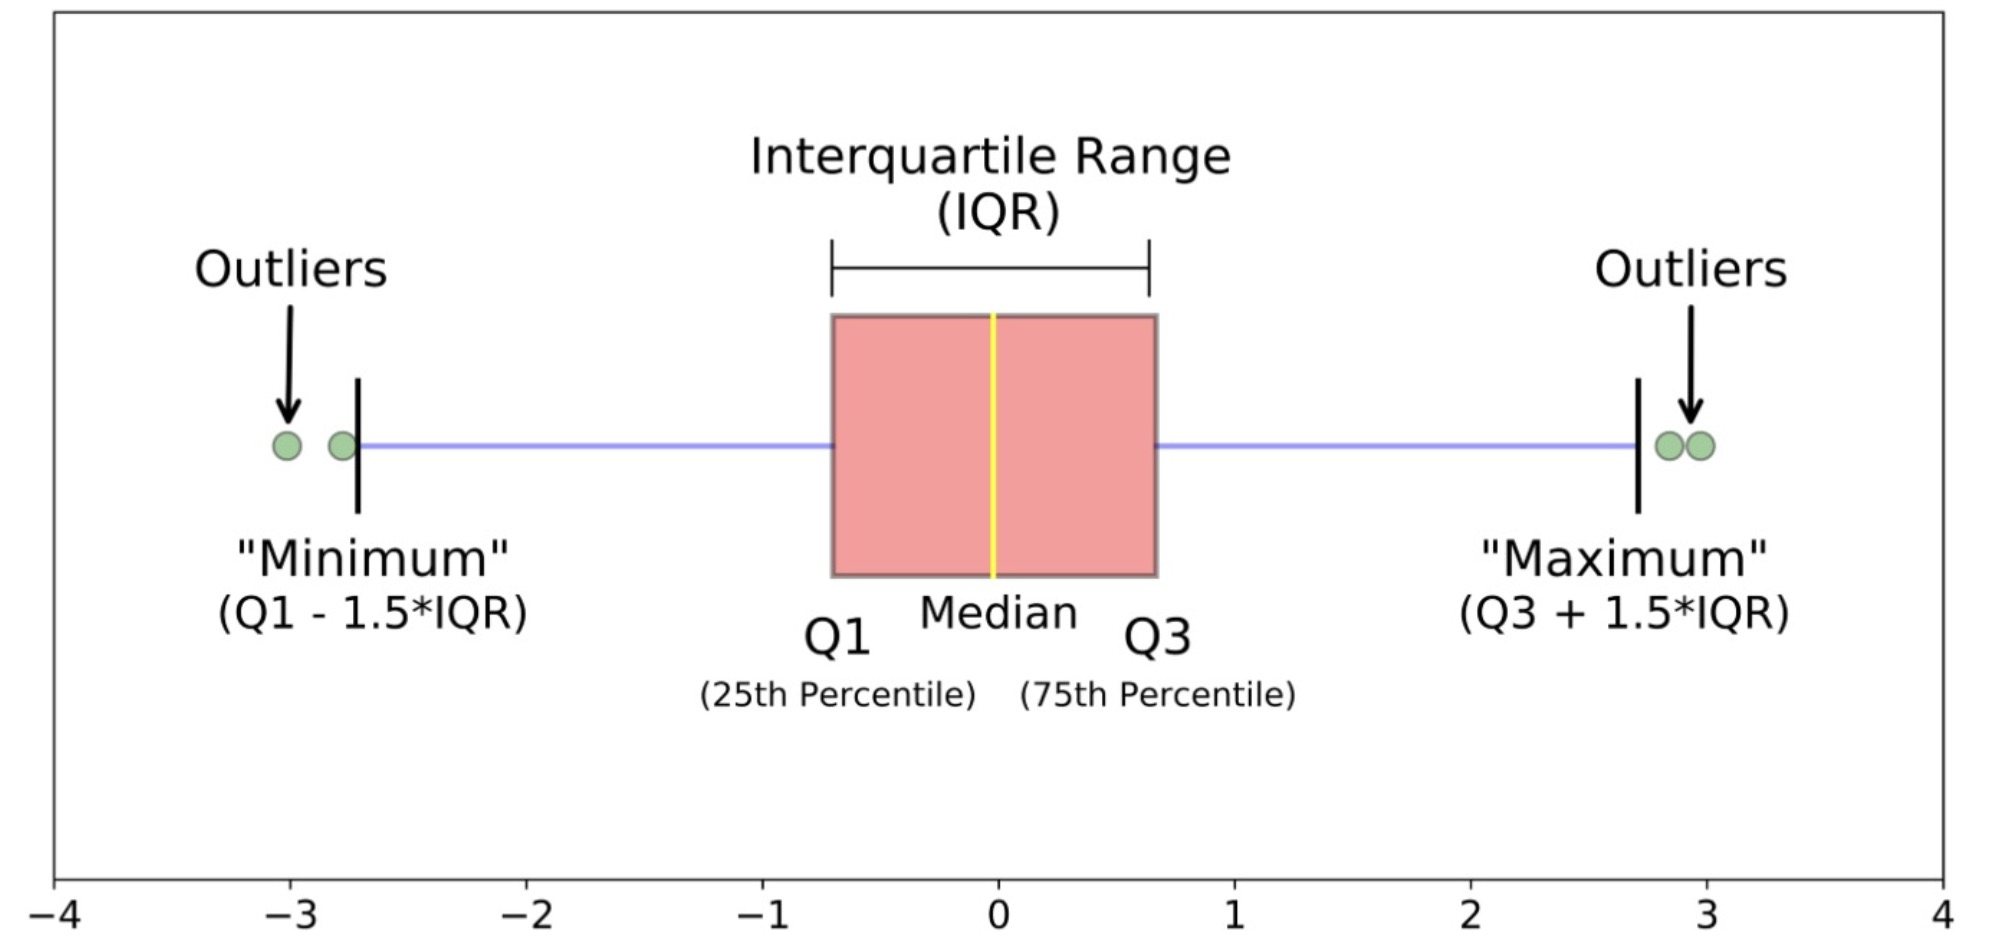

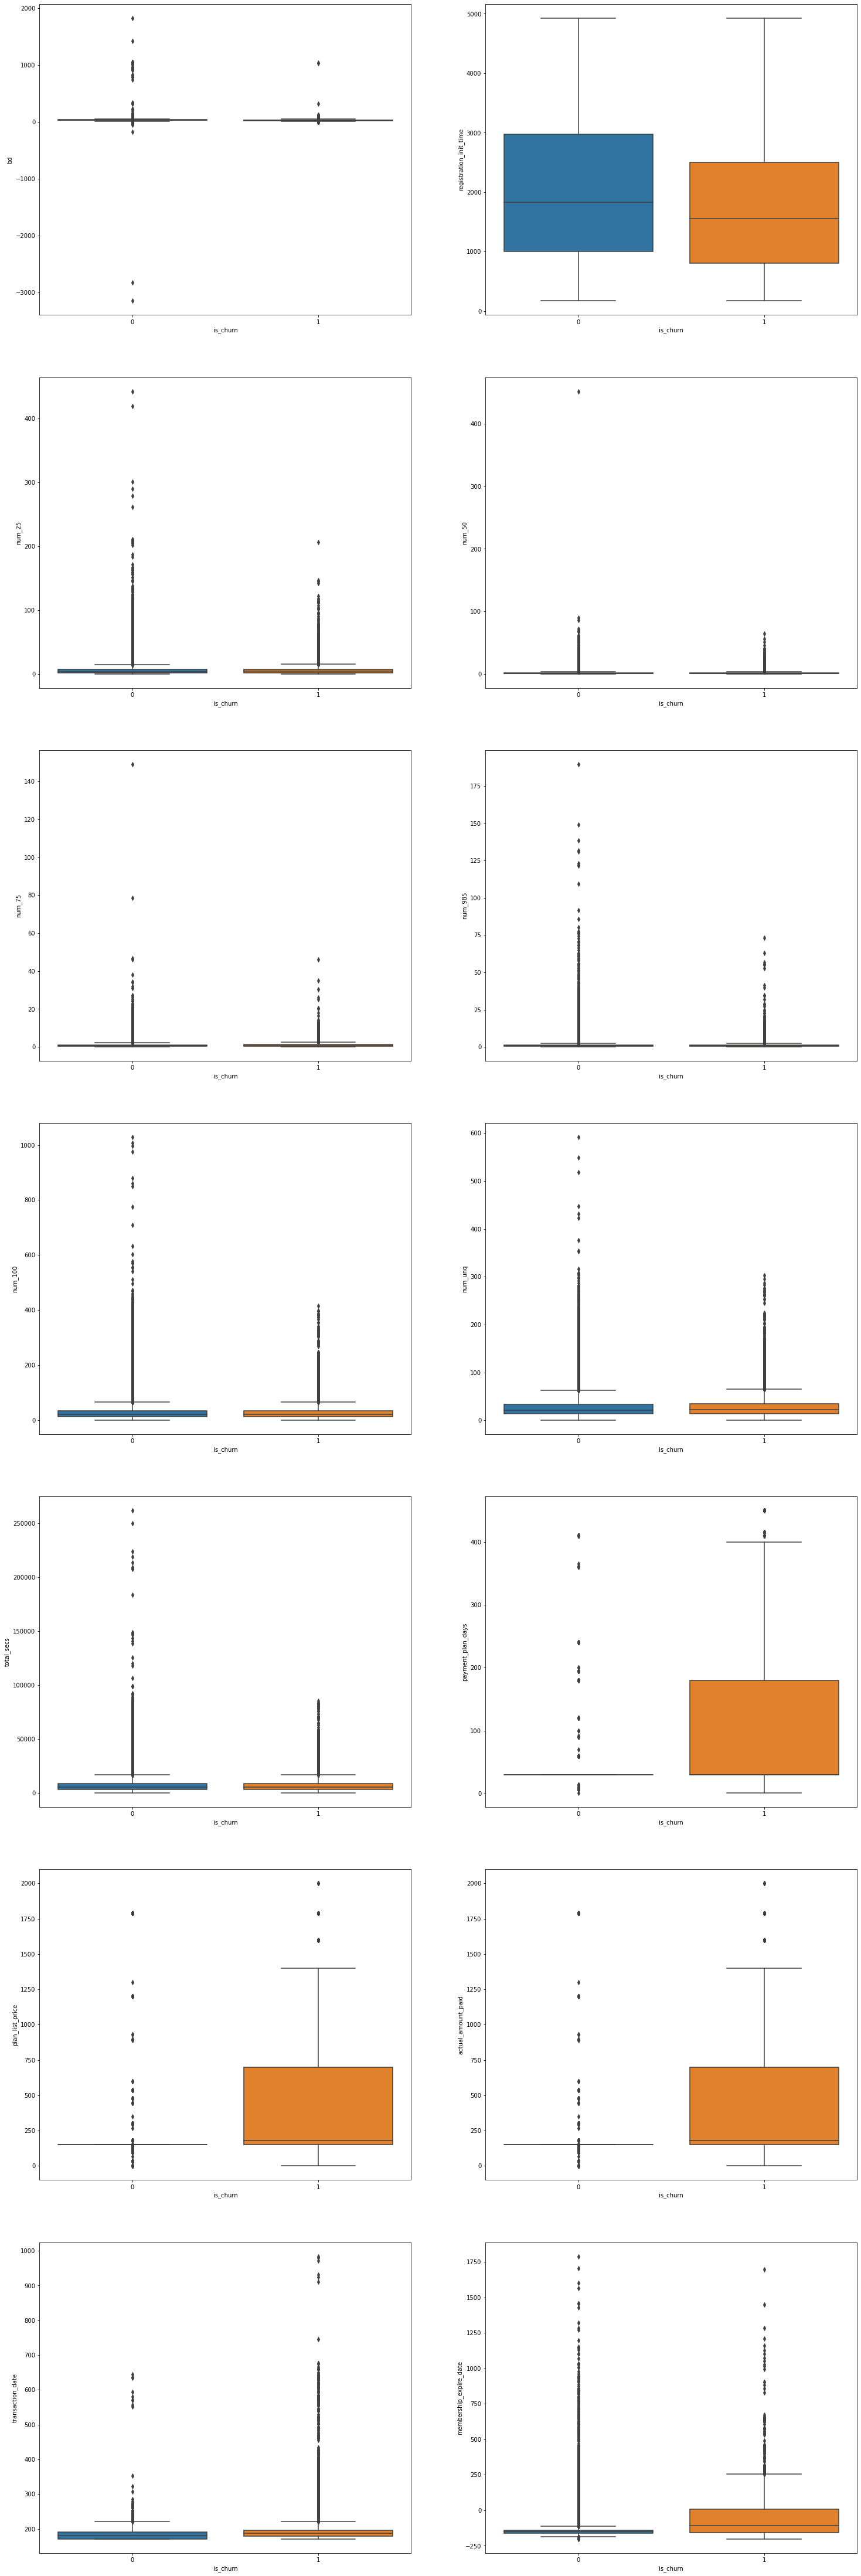

In [ ]:
# boxplot for numerical feature
_,axss = plt.subplots(7,2, figsize=[25,80])
for i in range(len(num_cols)):
    row = i//2
    col = i%2
    sns.boxplot(x='is_churn', y=num_cols[i], data=data, ax=axss[row][col])
# "age" has extreme outliers
# users with late registration time have a higher chance of churn
# users who spent more time on KKBox/music listening have a higher chance of retention
# users with greater length of membership plan in days have a higher chance of churn
# users with higher plan list price/actual amount paid have a higher risk of churn
# users with early transaction date have a higher risk of churn

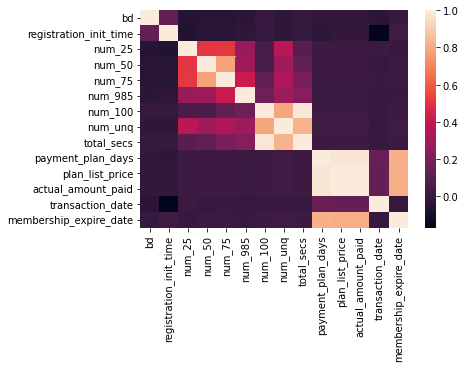

In [ ]:
# correlation between features
corr_score = data[num_cols].corr()

# show heatmap of correlations
sns.heatmap(corr_score)

In [ ]:
corr_score

,bd,registration_init_time,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,payment_plan_days,plan_list_price,actual_amount_paid,transaction_date,membership_expire_date
bd,1.000000,0.123861,-0.051805,-0.044218,-0.049694,-0.032023,0.001897,-0.025338,-0.002798,-0.011631,-0.011349,-0.011144,-0.032866,0.001729
registration_init_time,0.123861,1.000000,-0.059524,-0.042676,-0.041931,-0.020516,-0.001443,-0.021601,-0.004343,-0.025385,-0.010779,-0.010334,-0.168888,0.029514
num_25,-0.051805,-0.059524,1.000000,0.503021,0.515474,0.278849,0.055774,0.377777,0.101357,0.014085,0.013811,0.013860,0.011142,0.004558
num_50,-0.044218,-0.042676,0.503021,1.000000,0.782882,0.288169,0.062760,0.297484,0.124141,0.016374,0.016235,0.016267,0.003379,0.009871
num_75,-0.049694,-0.041931,0.515474,0.782882,1.000000,0.415093,0.119843,0.333758,0.188323,0.019364,0.019470,0.019505,0.008304,0.011559
num_985,-0.032023,-0.020516,0.278849,0.288169,0.415093,1.000000,0.155827,0.286787,0.224607,0.012392,0.012944,0.013040,0.004477,0.008830
num_100,0.001897,-0.001443,0.055774,0.062760,0.119843,0.155827,1.000000,0.791780,0.982503,0.017165,0.019171,0.018991,-0.003470,0.017073
num_unq,-0.025338,-0.021601,0.377777,0.297484,0.333758,0.286787,0.791780,1.000000,0.828393,0.027586,0.028933,0.028771,0.000142,0.023834
total_secs,-0.002798,-0.004343,0.101357,0.124141,0.188323,0.224607,0.982503,0.828393,1.000000,0.018757,0.021027,0.020835,-0.004036,0.018628
payment_plan_days,-0.011631,-0.025385,0.014085,0.016374,0.019364,0.012392,0.017165,0.027586,0.018757,1.000000,0.980939,0.980488,0.142863,0.822422


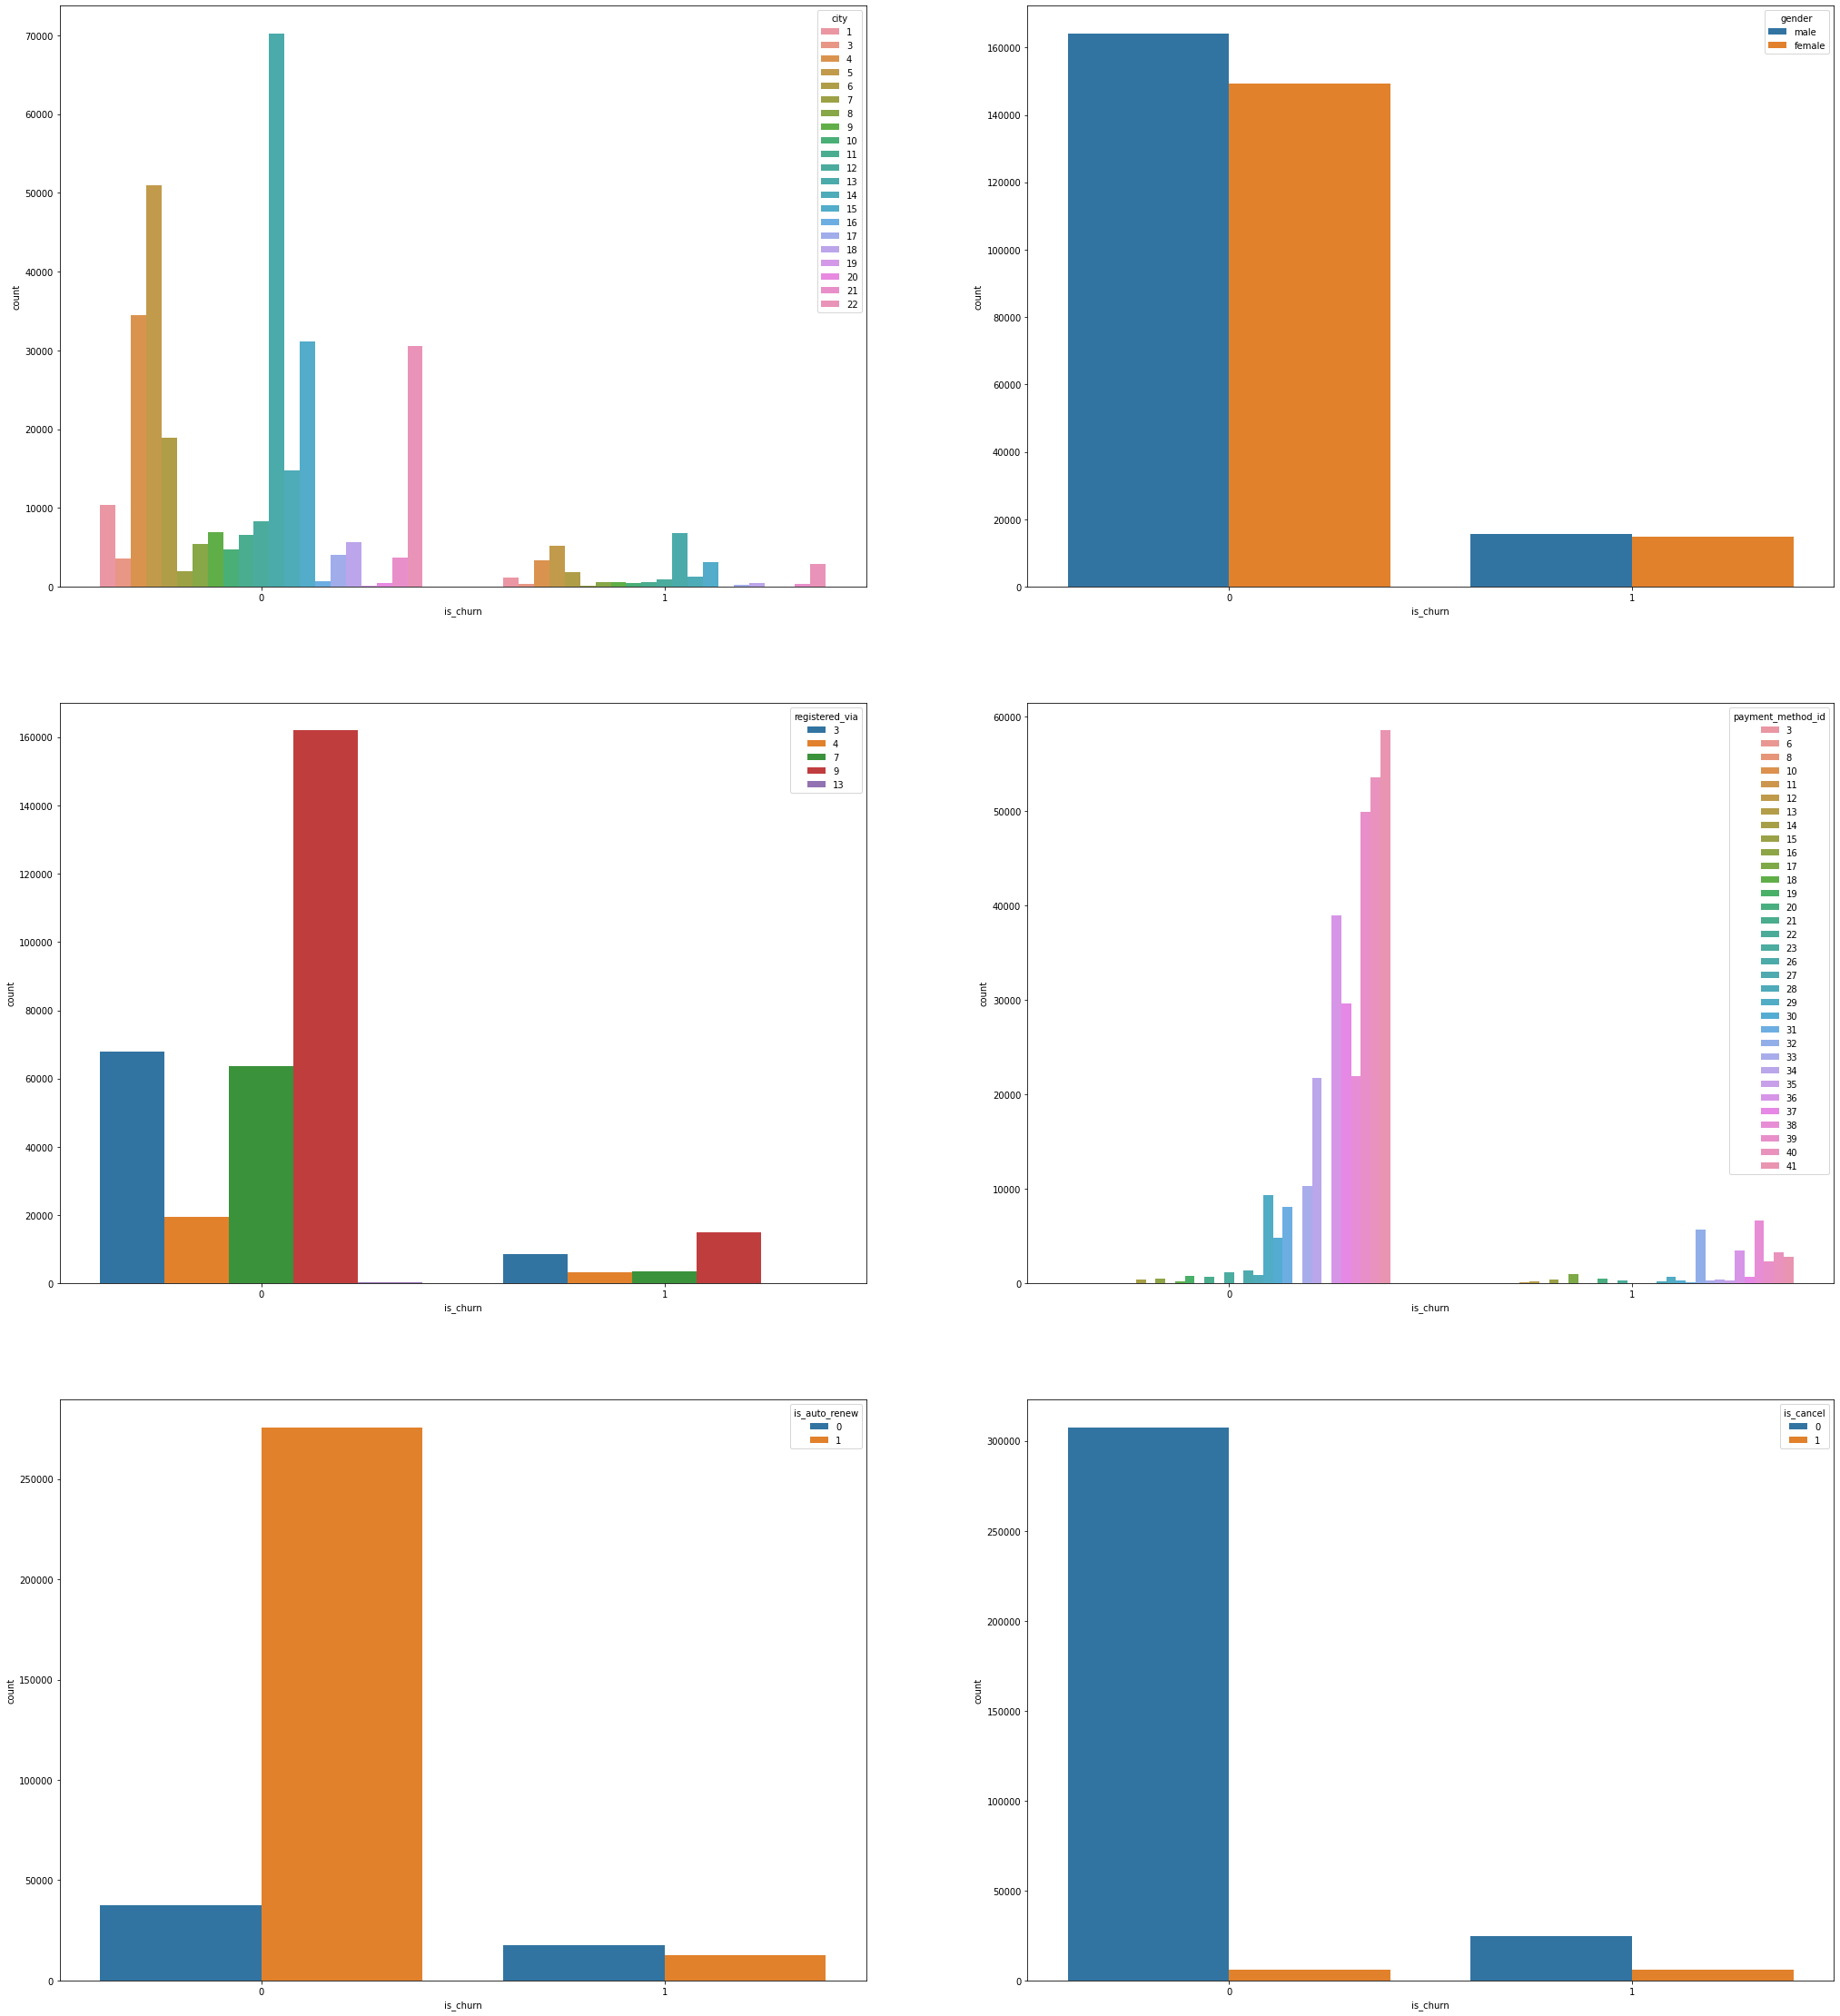

In [ ]:
# understand categorical feature
# "city", "gender", "registered_via", "payment_method_id", "is_auto_renew", "is_cancal"
_,axss = plt.subplots(3,2, figsize=[35,40])
sns.countplot(x='is_churn', hue='city', data=data, ax=axss[0][0])
sns.countplot(x='is_churn', hue='gender', data=data, ax=axss[0][1])
sns.countplot(x='is_churn', hue='registered_via', data=data, ax=axss[1][0])
sns.countplot(x='is_churn', hue='payment_method_id', data=data, ax=axss[1][1])
sns.countplot(x='is_churn', hue='is_auto_renew', data=data, ax=axss[2][0])
sns.countplot(x='is_churn', hue='is_cancel', data=data, ax=axss[2][1])
# female have a higher risk of churn
# users who set auto renewal have a higher chance of retention
# users who canceled the membership have a higher risk of churn

# Part 2: Feature Preprocessing

In [ ]:
# Get feature space by dropping useless feature
to_drop = ['msno','is_churn', 'today']
#idx = np.random.choice(300000, size=50000, replace=False)
#X = data.drop(to_drop, axis=1).iloc[idx,:]
# get target variable
X = data.drop(to_drop, axis=1)
#y = data["is_churn"].iloc[idx]
y = data["is_churn"]

In [ ]:
X.head()

,city,bd,gender,registered_via,registration_init_time,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
1,4,30,male,9,2194,2.333333,1.333333,1.000000,1.833333,86.333333,11.166667,20611.449000,39,30,149,149,1,171,-124,0
2,13,63,male,9,2192,4.277778,1.722222,0.722222,1.444444,14.944444,18.722222,4469.457500,40,30,149,149,1,175,-145,0
4,4,28,female,9,2190,1.200000,0.100000,0.200000,0.200000,11.700000,6.800000,2249.476400,36,30,180,180,1,199,-169,0
5,5,27,male,9,2183,10.043478,2.695652,1.130435,0.956522,27.347826,27.913043,7152.184609,39,30,149,149,1,171,-110,0
6,22,38,female,9,2181,1.666667,0.333333,0.333333,0.333333,5.500000,5.833333,1518.184000,40,30,149,149,1,191,-161,0


In [ ]:
X.dtypes

city                        int64
bd                          int64
gender                     object
registered_via              int64
registration_init_time      int64
num_25                    float64
num_50                    float64
num_75                    float64
num_985                   float64
num_100                   float64
num_unq                   float64
total_secs                float64
payment_method_id           int64
payment_plan_days           int64
plan_list_price             int64
actual_amount_paid          int64
is_auto_renew               int64
transaction_date            int64
membership_expire_date      int64
is_cancel                   int64
dtype: object

In [ ]:
num_cols

['bd',
 'registration_init_time',
 'num_25',
 'num_50',
 'num_75',
 'num_985',
 'num_100',
 'num_unq',
 'total_secs',
 'payment_plan_days',
 'plan_list_price',
 'actual_amount_paid',
 'transaction_date',
 'membership_expire_date']

In [ ]:
cat_cols

['city',
 'gender',
 'registered_via',
 'payment_method_id',
 'is_auto_renew',
 'is_cancel']

Split dataset

In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.03, 
                                                                    stratify = y, random_state=123) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 333597 observation with 20 features
test data has 10318 observation with 20 features


In [ ]:
X_train.head()

,city,bd,gender,registered_via,registration_init_time,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
29962,13,24,male,9,1674,3.500000,2.041667,1.166667,1.750000,9.166667,15.000000,3143.889458,37,30,149,149,1,193,-157,0
18064,5,23,female,4,433,2.064516,0.516129,0.387097,0.322581,31.774194,26.612903,8383.540935,36,30,180,180,1,186,-156,0
405426,8,29,male,9,2467,1.761905,0.857143,0.619048,1.619048,8.333333,12.000000,2733.655952,37,30,149,149,1,185,-155,0
98980,12,32,female,7,302,8.000000,1.000000,0.166667,0.333333,7.000000,13.833333,1793.776667,41,30,149,149,1,192,-192,1
399979,13,24,female,7,2211,3.133333,0.366667,0.300000,0.433333,14.166667,13.366667,3781.284033,41,30,149,149,1,175,-143,0


In [ ]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
    transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names_out(categories))
    return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['city', 'registered_via', 'payment_method_id']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

In [ ]:
X_train.head()

,bd,gender,registration_init_time,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,...,payment_method_id_32,payment_method_id_33,payment_method_id_34,payment_method_id_35,payment_method_id_36,payment_method_id_37,payment_method_id_38,payment_method_id_39,payment_method_id_40,payment_method_id_41
0,24,male,1674,3.500000,2.041667,1.166667,1.750000,9.166667,15.000000,3143.889458,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,23,female,433,2.064516,0.516129,0.387097,0.322581,31.774194,26.612903,8383.540935,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,29,male,2467,1.761905,0.857143,0.619048,1.619048,8.333333,12.000000,2733.655952,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,32,female,302,8.000000,1.000000,0.166667,0.333333,7.000000,13.833333,1793.776667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,24,female,2211,3.133333,0.366667,0.300000,0.433333,14.166667,13.366667,3781.284033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

categories = ['gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

In [ ]:
X_train.head()

,bd,gender,registration_init_time,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,...,payment_method_id_32,payment_method_id_33,payment_method_id_34,payment_method_id_35,payment_method_id_36,payment_method_id_37,payment_method_id_38,payment_method_id_39,payment_method_id_40,payment_method_id_41
0,24,1.0,1674,3.500000,2.041667,1.166667,1.750000,9.166667,15.000000,3143.889458,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,23,0.0,433,2.064516,0.516129,0.387097,0.322581,31.774194,26.612903,8383.540935,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,29,1.0,2467,1.761905,0.857143,0.619048,1.619048,8.333333,12.000000,2733.655952,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,32,0.0,302,8.000000,1.000000,0.166667,0.333333,7.000000,13.833333,1793.776667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,24,0.0,2211,3.133333,0.366667,0.300000,0.433333,14.166667,13.366667,3781.284033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# deal with outliers in "age"
X_train['bd'] = np.where(X_train['bd'] < 10, 10, X_train['bd'])
X_train['bd'] = np.where(X_train['bd'] > 100, 100, X_train['bd'])

In [ ]:
X_train.head()

,bd,gender,registration_init_time,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,...,payment_method_id_32,payment_method_id_33,payment_method_id_34,payment_method_id_35,payment_method_id_36,payment_method_id_37,payment_method_id_38,payment_method_id_39,payment_method_id_40,payment_method_id_41
0,24,1.0,1674,3.500000,2.041667,1.166667,1.750000,9.166667,15.000000,3143.889458,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,23,0.0,433,2.064516,0.516129,0.387097,0.322581,31.774194,26.612903,8383.540935,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,29,1.0,2467,1.761905,0.857143,0.619048,1.619048,8.333333,12.000000,2733.655952,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,32,0.0,302,8.000000,1.000000,0.166667,0.333333,7.000000,13.833333,1793.776667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,24,0.0,2211,3.133333,0.366667,0.300000,0.433333,14.166667,13.366667,3781.284033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Standardize/Normalize Data

In [ ]:
# pay more attention to features with larger values, especially for the models that we have to compute the distance
# such as linear regression, knn

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
X_train.sample(5)

,bd,gender,registration_init_time,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,...,payment_method_id_32,payment_method_id_33,payment_method_id_34,payment_method_id_35,payment_method_id_36,payment_method_id_37,payment_method_id_38,payment_method_id_39,payment_method_id_40,payment_method_id_41
217373,-0.980460,0.0,-1.113004,0.400454,0.277835,0.013947,-0.021846,-0.582135,-0.354202,-0.569127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
156296,-0.664513,1.0,0.032884,-0.480995,-0.208665,-0.029472,-0.259338,-0.869749,-0.982261,-0.906089,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
81237,1.863065,0.0,0.292120,-0.340450,-0.291694,0.060840,-0.057600,-0.458435,-0.445304,-0.485623,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
237406,0.072698,0.0,-1.419953,-0.667631,-0.208665,-0.897858,-0.604781,-0.671682,-0.784627,-0.758963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1378,1.125855,1.0,1.412561,2.556187,3.924271,5.317307,1.105162,0.997875,1.912752,1.174666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# check imbalanced data
y_train.value_counts()

0    303999
1     29598
Name: is_churn, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.35)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)
y_train.value_counts()

0    86854
1    30399
Name: is_churn, dtype: int64

# Part 3: Model Training and Result Evaluation

### Part 3.1: Model Training

In [ ]:
#@title build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression(max_iter=500)

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [ ]:
# Train the model
classifier_logistic.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
# Prediction of test data
classifier_logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

0.9507656522581895

In [ ]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

### Part 3.2: Use Grid Search to Find Optimal Hyperparameters
alternative: random search

In [ ]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

### Part 3.2.1: Find Optimal Hyperparameters - LogisticRegression

In [ ]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the 1/lambda value(weight) for L1 and L2
# solver: algorithm to find the weights that minimize the cost function

# ('l1', 0.01)('l1', 0.05) ('l1', 0.1) ('l1', 0.2)('l1', 1)
# ('12', 0.01)('l2', 0.05) ('l2', 0.1) ('l2', 0.2)('l2', 1)
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 0.05, 0.1, 0.2, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=500), parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500, solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l1', 'l2')})

In [ ]:
# the best hyperparameter combination
# C = 1/lambda
print_grid_search_metrics(Grid_LR)

Best score: 0.9027146447626266
Best parameters set:
C:0.1
penalty:l1


In [ ]:
# best model
best_LR_model = Grid_LR.best_estimator_

In [ ]:
best_LR_model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
best_LR_model.score(X_test, y_test)

0.9506687342508238

In [ ]:
# membership_expire_date
best_LR_model.coef_[0][15]

3.019438441189066

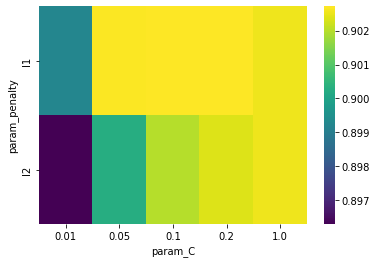

In [ ]:
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score')
# Return reshaped DataFrame organized by given index / column values
_ = sns.heatmap(res, cmap='viridis')

#### Part 3.2.2: Find Optimal Hyperparameters: KNN

In [ ]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [ ]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.8829454303802177
Best parameters set:
n_neighbors:7


In [ ]:
best_KNN_model = Grid_KNN.best_estimator_

#### Part 3.2.3: Find Optimal Hyperparameters: Random Forest

In [ ]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [100,200,500],
    'max_depth': [20,25,30,35]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 25, 30, 35],
                         'n_estimators': [100, 200, 500]})

In [ ]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.9449737110969213
Best parameters set:
max_depth:35
n_estimators:500


In [ ]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

#### Part 3.3: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

class of interest as positive

TP: correctly labeled real churn

Precision(PPV, positive predictive value): tp / (tp + fp);
Total number of true predictive churn divided by the total number of predictive churn;
High Precision means low fp, not many return users were predicted as churn users. 


Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn)
Predict most postive or churn user correctly. High recall means low fn, not many churn users were predicted as return users.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1 = 2*(precision*recall) / (precision+recall)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("Precision is: " + str(precision))
    print ("Recall is: " + str(recall))
    print ("F1 is: " + str(f1))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [ ]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.9710215157976352
Precision is: 0.8429844097995546
Recall is: 0.8273224043715847
F1 is: 0.8350799779371209

Logistic Regression
Accuracy is: 0.9506687342508238
Precision is: 0.736046511627907
Recall is: 0.6918032786885245
F1 is: 0.7132394366197183

K nearest neighbor
Accuracy is: 0.9467920139561931
Precision is: 0.7707100591715976
Recall is: 0.5693989071038251
F1 is: 0.6549340037712131



### Part 3.4: Model Evaluation - ROC & AUC

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function 

#### Part 3.4.1: ROC of RF Model

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [ ]:
best_RF_model.predict_proba(X_test)

array([[0.98481954, 0.01518046],
       [0.96981437, 0.03018563],
       [0.98163993, 0.01836007],
       ...,
       [0.98926666, 0.01073334],
       [0.97779247, 0.02220753],
       [0.9853599 , 0.0146401 ]])

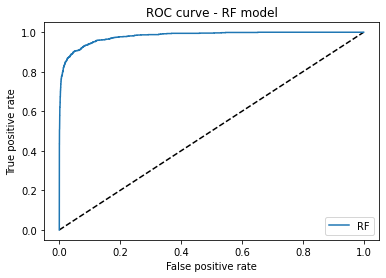

In [ ]:
# ROC curve of Random Forest result
import matplotlib.pyplot as plt
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.980647787678505

#### Part 3.4.1: ROC of LR Model

In [ ]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

In [ ]:
best_LR_model.predict_proba(X_test)

array([[0.9652651 , 0.0347349 ],
       [0.75672233, 0.24327767],
       [0.87960189, 0.12039811],
       ...,
       [0.91073853, 0.08926147],
       [0.92702502, 0.07297498],
       [0.91640149, 0.08359851]])

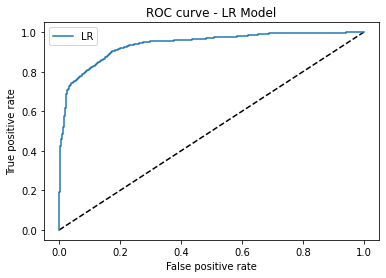

In [ ]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [ ]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.9390166723909181

# Part 4: Model Extra Functionality

### Part 4.1:  Random Forest Model - Feature Importance Discussion

In [ ]:
X_RF = X.copy()

X_RF = OneHotEncoding(X_RF, enc_ohe, ['city', 'registered_via', 'payment_method_id'])
X_RF['gender'] = enc_oe.transform(X_RF[['gender']])
X_RF['bd'] = np.where(X_RF['bd'] < 10, 10, X_RF['bd'])
X_RF['bd'] = np.where(X_RF['bd'] > 100, 100, X_RF['bd'])

X_RF.head()

,bd,gender,registration_init_time,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,...,payment_method_id_32,payment_method_id_33,payment_method_id_34,payment_method_id_35,payment_method_id_36,payment_method_id_37,payment_method_id_38,payment_method_id_39,payment_method_id_40,payment_method_id_41
0,30,1.0,2194,2.333333,1.333333,1.000000,1.833333,86.333333,11.166667,20611.449000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,63,1.0,2192,4.277778,1.722222,0.722222,1.444444,14.944444,18.722222,4469.457500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,28,0.0,2190,1.200000,0.100000,0.200000,0.200000,11.700000,6.800000,2249.476400,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,27,1.0,2183,10.043478,2.695652,1.130435,0.956522,27.347826,27.913043,7152.184609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,38,0.0,2181,1.666667,0.333333,0.333333,0.333333,5.500000,5.833333,1518.184000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X_RF, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X_RF.shape[1]):
    print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
membership_expire_date : 0.2567
payment_plan_days : 0.1054
actual_amount_paid : 0.0942
plan_list_price : 0.0865
transaction_date : 0.0715
is_cancel : 0.054
registration_init_time : 0.0289
total_secs : 0.0247
num_unq : 0.0243
num_25 : 0.0243
num_100 : 0.0243
payment_method_id_32 : 0.0242
num_50 : 0.023
num_985 : 0.0227
num_75 : 0.0226
bd : 0.0191
is_auto_renew : 0.0175
payment_method_id_39 : 0.0103
payment_method_id_17 : 0.0054
gender : 0.0043
payment_method_id_38 : 0.0038
payment_method_id_41 : 0.0037
city_13 : 0.0029
payment_method_id_40 : 0.0028
registered_via_9 : 0.0027
registered_via_7 : 0.0027
city_5 : 0.0026
registered_via_3 : 0.0024
city_4 : 0.0024
city_22 : 0.0022
city_15 : 0.002
payment_method_id_36 : 0.002
city_6 : 0.0017
registered_via_4 : 0.0015
payment_method_id_15 : 0.0014
city_1 : 0.0014
payment_method_id_37 : 0.0014
city_14 : 0.0013
city_12 : 0.0011
payment_method_id_29 : 0.001
city_9 : 0.001
payment_method_id_22 : 0.00